In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
twitter_df = pd.read_csv("data/Twitter_Data.csv")
reddit_df = pd.read_csv("data/Reddit_Data.csv")


In [3]:
twitter_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
twitter_df = twitter_df.rename(columns={"clean_text":"text"})

In [5]:
reddit_df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
reddit_df = reddit_df.rename(columns={"clean_comment":"text"})

In [7]:
df = pd.concat([reddit_df,twitter_df],axis=0)
df.head()

,text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [8]:
df.shape

(200229, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200229 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   text      200125 non-null  object 
 1   category  200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [10]:
df.isnull().sum()

text        104
category      7
dtype: int64

In [11]:
df.dropna(inplace=True)
df

,text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [12]:
df.duplicated().sum()

np.int64(410)

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [14]:
df = df[~(df["text"].str.strip()=="")]
df.shape

(199702, 2)

In [15]:
df["text"] = df["text"].str.lower()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/2070785541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].str.lower()


In [16]:
df["text"] = df["text"].str.strip()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/2086694713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].str.strip()


In [17]:
import re

url_pattern = re.compile(
    r'^(https?:\/\/)?'                   # http:// veya https:// (isteğe bağlı)
    r'([\da-z\.-]+)\.'                   # alt alan adı (subdomain)
    r'([a-z\.]{2,6})'                    # üst seviye alan (TLD)
    r'([\/\w \.-]*)*\/?$'               # yol (path) kısmı
) 

comment_with_urls = df[df["text"].str.contains(url_pattern,regex=True)]
comment_with_urls.head()
   

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/4265159407.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  comment_with_urls = df[df["text"].str.contains(url_pattern,regex=True)]


,text,category


In [18]:
comment_with_new_line = df[df["text"].str.contains('\n')]
comment_with_new_line.head()

,text,category
448,what missing jpg\nand why this brilliant edit ...,1.0
781,india has been ruined congress and populist sc...,-1.0
847,like aap for its stand corruption and making p...,-1.0
871,reduced trade\ndeficit stronger rupee aren the...,0.0
1354,amsa press conference australian maritime safe...,1.0


In [19]:
df["text"] = df["text"].str.replace('\n',' ',regex=True)
comment_with_new_line = df[df["text"].str.contains('\n')]
comment_with_new_line.head()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/2359021205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].str.replace('\n',' ',regex=True)


,text,category


In [20]:
df["category"] = df["category"].astype("int")

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/838177745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = df["category"].astype("int")


<Axes: xlabel='category', ylabel='count'>

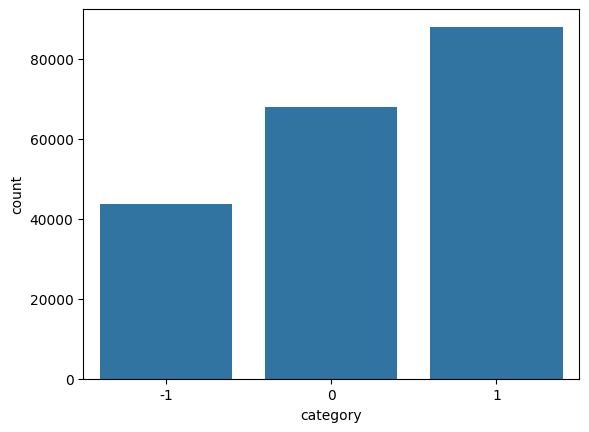

In [21]:
sns.countplot(data=df,x="category")

In [22]:
df["category"].value_counts(normalize=True).mul(100).round(2)

category
 1    44.06
 0    34.03
-1    21.91
Name: proportion, dtype: float64

In [23]:
df["word_count"] = df["text"].apply(lambda x:len(x.split()))
df.head()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/928629369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"] = df["text"].apply(lambda x:len(x.split()))


,text,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [24]:
df.word_count.describe()

count    199702.000000
mean         21.852560
std          26.541971
min           1.000000
25%          10.000000
50%          18.000000
75%          29.000000
max        1307.000000
Name: word_count, dtype: float64

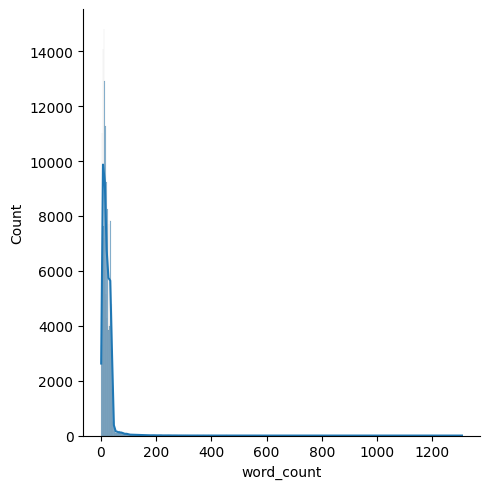

In [25]:
sns.displot(df.word_count,kde=True)

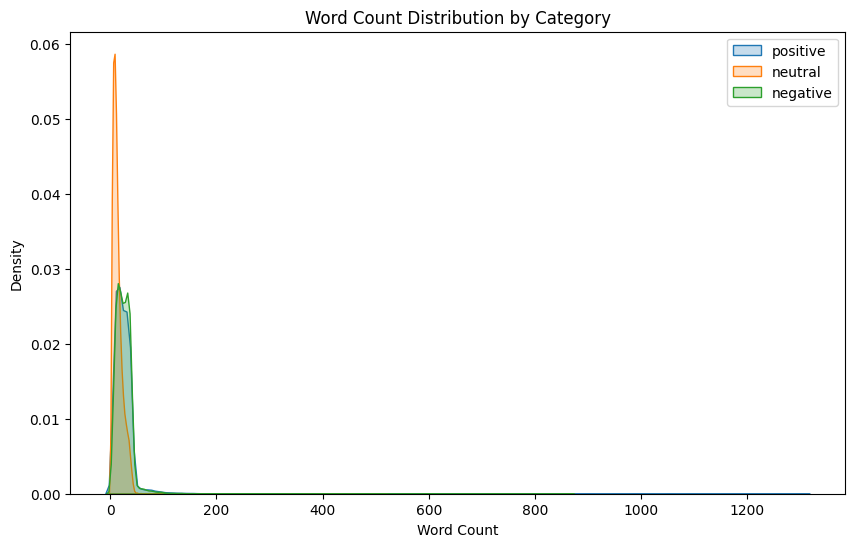

In [26]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df["category"]==1]["word_count"],label="positive",fill=True)
sns.kdeplot(df[df["category"]==0]["word_count"],label="neutral",fill=True)
sns.kdeplot(df[df["category"]==-1]["word_count"],label="negative",fill=True)

plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.legend()

<Axes: xlabel='word_count'>

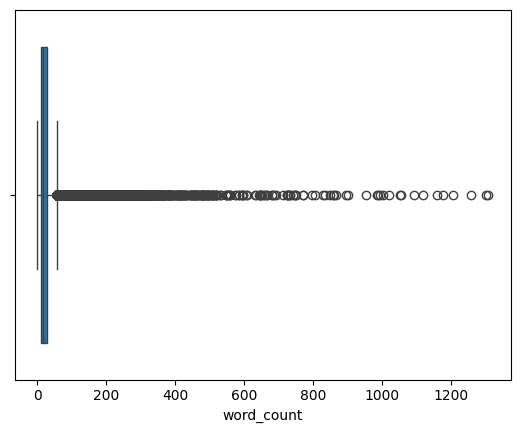

In [27]:
sns.boxplot(x=df.word_count)

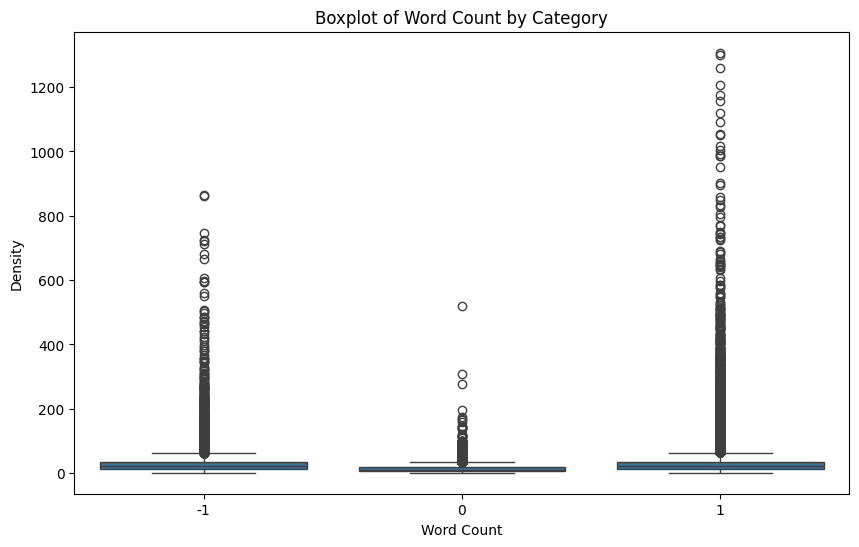

In [28]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df,x="category",y="word_count")

plt.title("Boxplot of Word Count by Category")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.show()

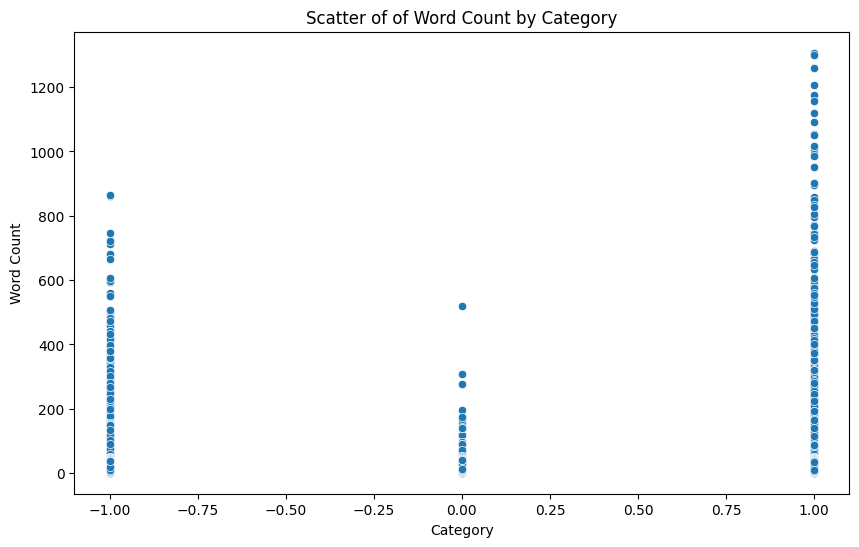

In [29]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x="category",y="word_count")

plt.title("Scatter of of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bedirhancelik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/3170530786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x="count", y="stop_word", palette="viridis")


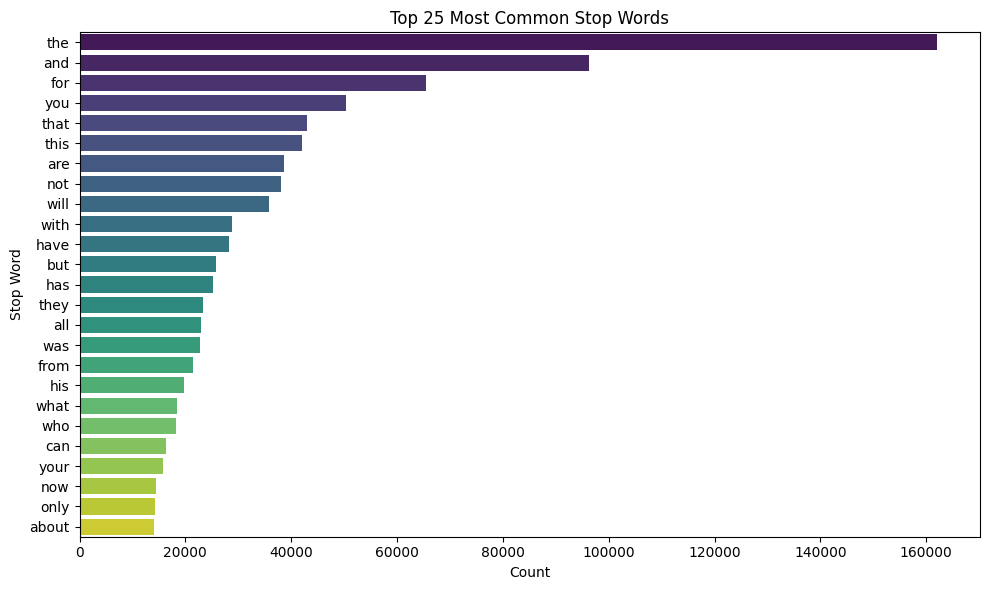

In [30]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

all_stop_words = [
    word
    for comment in df["text"]
    for word in comment.split()
    if word in stop_words
]

most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=["stop_word", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_25_df, x="count", y="stop_word", palette="viridis")
plt.title("Top 25 Most Common Stop Words")
plt.xlabel("Count")
plt.ylabel("Stop Word")
plt.tight_layout()
plt.show()


In [31]:
df["num_chars"] = df["text"].apply(len)
df.num_chars.describe()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/1909149553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_chars"] = df["text"].apply(len)


count    199702.000000
mean        134.395975
std         167.675736
min           1.000000
25%          60.000000
50%         108.000000
75%         183.000000
max        8664.000000
Name: num_chars, dtype: float64

In [32]:
all_text = ' '.join(df["text"])
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(),columns=["character","frequency"]).sort_values(by="frequency")
char_freq_df

,character,frequency
1626,➗,1
551,∀,1
552,ậ,1
555,送,1
557,程,1
...,...,...
3,i,1782109
13,t,1802308
1,a,1967436
12,e,2465062


In [33]:
import string

punctuation_chars = set(string.punctuation) 

df["num_punctuation_chars"] = df["text"].apply(
    lambda x: sum(1 for char in str(x) if char in punctuation_chars)
)

df.num_punctuation_chars.describe()


/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/4266428839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_punctuation_chars"] = df["text"].apply(


count    199702.000000
mean          0.006114
std           0.335926
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         136.000000
Name: num_punctuation_chars, dtype: float64

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/419646053.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x="count", y="bigram", palette="magma")


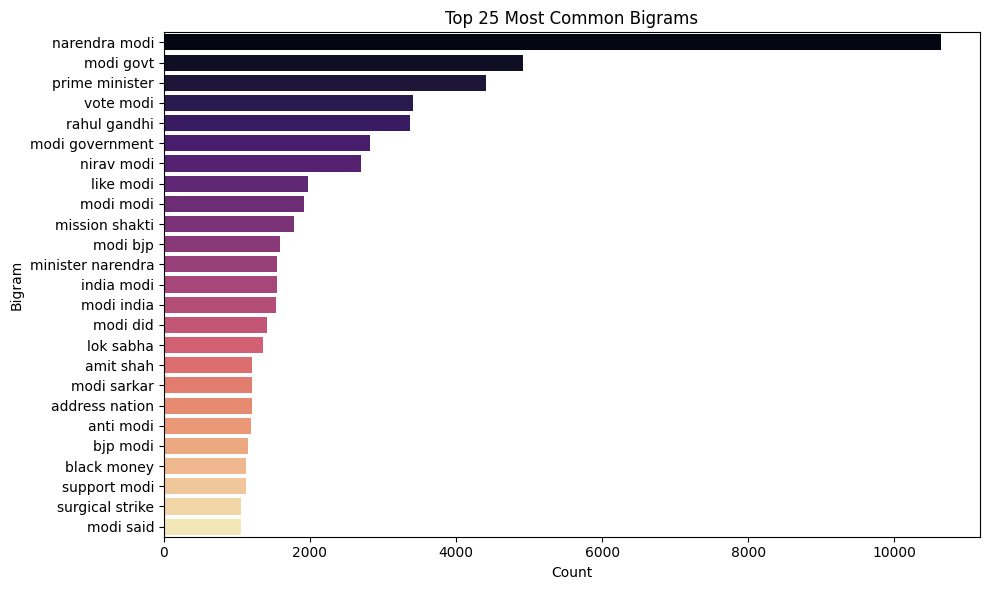

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(2, 2), stop_words='english'):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    bow = vec.fit_transform(corpus)
    sum_words = bow.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df["text"], n=25)

top_25_df = pd.DataFrame(top_25_bigrams, columns=["bigram", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_25_df, x="count", y="bigram", palette="magma")
plt.title("Top 25 Most Common Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/4012710226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x="count", y="trigram", palette="coolwarm")


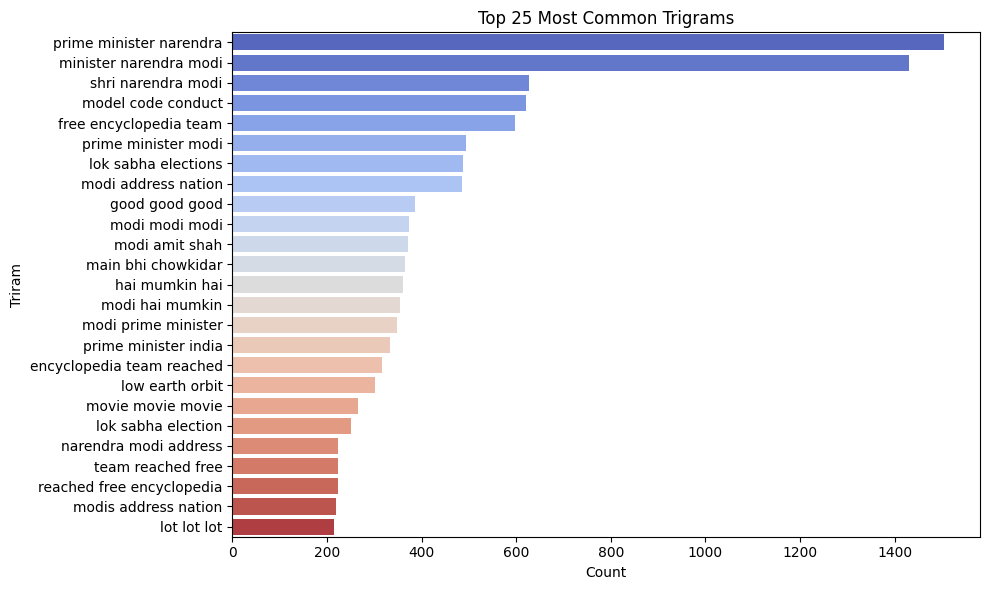

In [35]:
top_25_trigrams = get_top_ngrams(df.text,n=25,ngram_range=(3,3))

top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=["trigram", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_25_trigrams_df, x="count", y="trigram", palette="coolwarm")
plt.title("Top 25 Most Common Trigrams")
plt.xlabel("Count")
plt.ylabel("Triram")
plt.tight_layout()
plt.show()

In [36]:
df["text"] = df["text"].apply(lambda x: re.sub(r'[^a-zA-Z\s!?.,]', '', str(x)))


/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/1253573494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(lambda x: re.sub(r'[^a-zA-Z\s!?.,]', '', str(x)))


In [37]:
all_text = ' '.join(df.text)
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(),columns=["character","frequency"]).sort_values(by="frequency")
char_freq_df

,character,frequency
29,,1
32,\r,3
31,,4
27,\t,11
30,,28
28,,1146
23,q,15736
19,z,18580
15,x,29926
26,j,98842


In [38]:
stop_words = set(stopwords.words("english")) 

df["text"] = df["text"].apply(
    lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words])
)

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/3686174367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(


In [39]:
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

df["text"] = df["text"].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]) 
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bedirhancelik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/2015049484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(


,text,category,word_count,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,259,0
1,buddhism much lot compatible christianity espe...,1,196,1268,0
2,seriously say thing first get complex explain ...,-1,86,459,0
3,learned want teach different focus goal wrappi...,0,29,167,0
4,benefit may want read living buddha living chr...,1,112,690,0


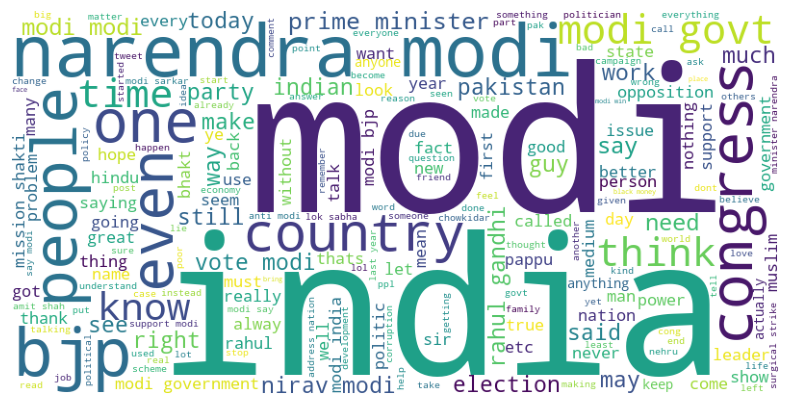

In [40]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800,height=400,background_color="white").generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plot_word_cloud(df.text)

/var/folders/j2/5thpfhw90bnddzd8vf1y20dr0000gn/T/ipykernel_94614/821037543.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_df, x="count", y="word", palette="viridis")


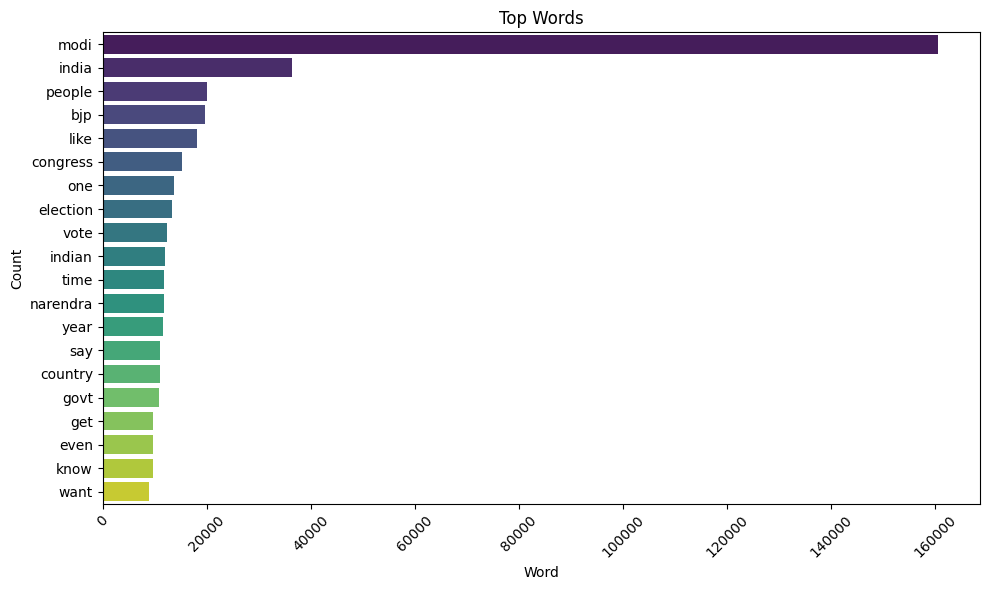

In [41]:
def plot_top_n_words(corpus, n=20, title="Top Words", stop_words=None):
    if stop_words is None:
        stop_words = set()

    words = [
        word.lower()
        for text in corpus.dropna()
        for word in text.split()
        if word.lower() not in stop_words
    ]

    top_words = Counter(words).most_common(n)
    top_df = pd.DataFrame(top_words, columns=["word", "count"])

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_df, x="count", y="word", palette="viridis")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel("Word")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
plot_top_n_words(df.text)

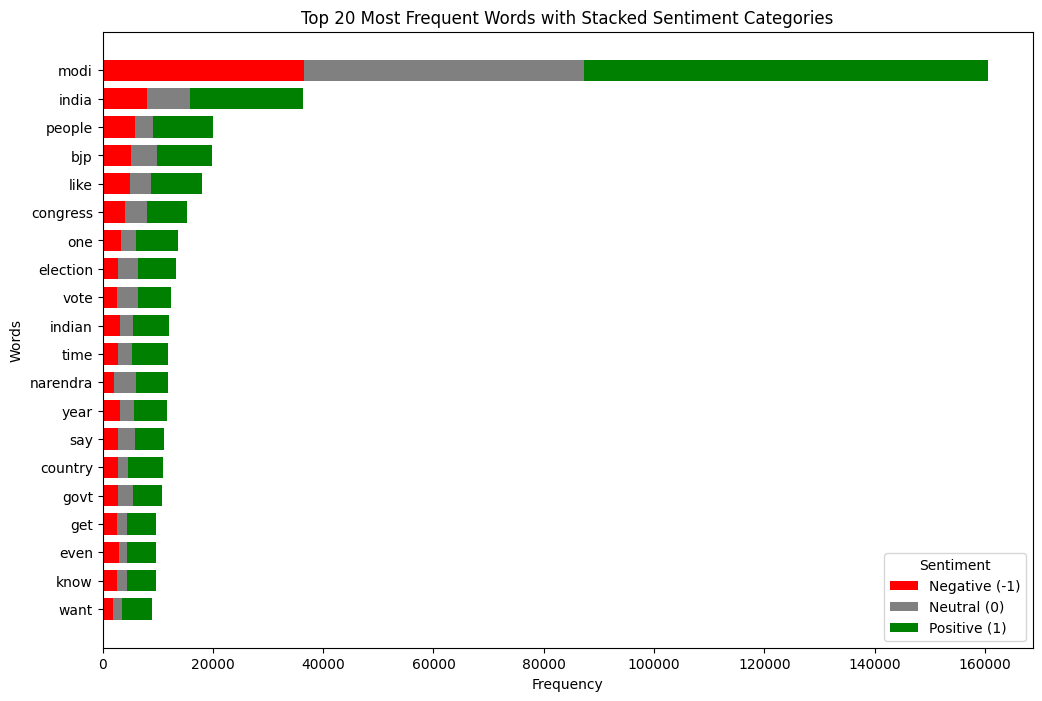

In [42]:

def plot_top_n_words_by_category(df, n=20, start=0):
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['text'].split()
        category = row['category']  

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  

            word_category_counts[word][category] += 1

    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis() 
    plt.show()



plot_top_n_words_by_category(df, n=20)

In [44]:
df

,text,category,word_count,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,259,0
1,buddhism much lot compatible christianity espe...,1,196,1268,0
2,seriously say thing first get complex explain ...,-1,86,459,0
3,learned want teach different focus goal wrappi...,0,29,167,0
4,benefit may want read living buddha living chr...,1,112,690,0
...,...,...,...,...,...
162975,crore paid neerav modi recovered congress lead...,-1,18,107,0
162976,dear rss terrorist payal gawar modi killing pl...,-1,36,248,0
162977,cover interaction forum left,0,9,50,0
162978,big project came india modi dream project happ...,0,13,77,0


In [ ]:
df.to_csv("data/preprocessing_df.csv")